# 회귀분석 (1) 주택가격 회귀 분석

In [39]:
import warnings

warnings.filterwarnings(action='ignore') 

## 데이터 수집

In [57]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [41]:
boston =load_boston()

In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
boston_df= pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


In [46]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 분석 모델 구축

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# X, Y 분할하기
y= boston_df['PRICE']
X=boston_df.drop(['PRICE'],axis=1,inplace=False)

In [49]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [51]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [52]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
y_predict = lr.predict(X_test)

In [54]:
y_predict[:5]

array([22.79706486, 19.52568184, 35.73324434, 19.61957154, 31.78013286])

In [55]:
y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
81     23.9
89     28.7
487    20.6
90     22.6
150    21.5
Name: PRICE, Length: 102, dtype: float64

## 결과 분석 및 시각화

In [61]:
#정확도 계산
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 18.140, RMSE : 4.259
R^2(Variance score) : 0.785


In [62]:
# 절편과 회귀계수를 찍어보자.
lr.intercept_

39.29051011945228

In [63]:
lr.coef_

array([-1.26922243e-01,  6.41812066e-02,  3.92889954e-02,  2.75649142e+00,
       -2.00898224e+01,  3.44900195e+00,  5.95889045e-03, -1.64557096e+00,
        3.28500267e-01, -1.31602465e-02, -8.84454934e-01,  9.24218918e-03,
       -5.44123065e-01])

In [64]:
np.round(lr.coef_,1) #위에꺼를 이쁘게 다듬음 보기쉽게

array([ -0.1,   0.1,   0. ,   2.8, -20.1,   3.4,   0. ,  -1.6,   0.3,
        -0. ,  -0.9,   0. ,  -0.5])

In [67]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  39.29051011945228
회귀 계수 값:  [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]


In [66]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns) 
# 시리즈로넣으면 인덱스값까지 바뀜
coef.sort_values(ascending = False)

RM          3.45
CHAS        2.76
RAD         0.33
ZN          0.06
INDUS       0.04
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.13
LSTAT      -0.54
PTRATIO    -0.88
DIS        -1.65
NOX       -20.09
dtype: float64

## 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

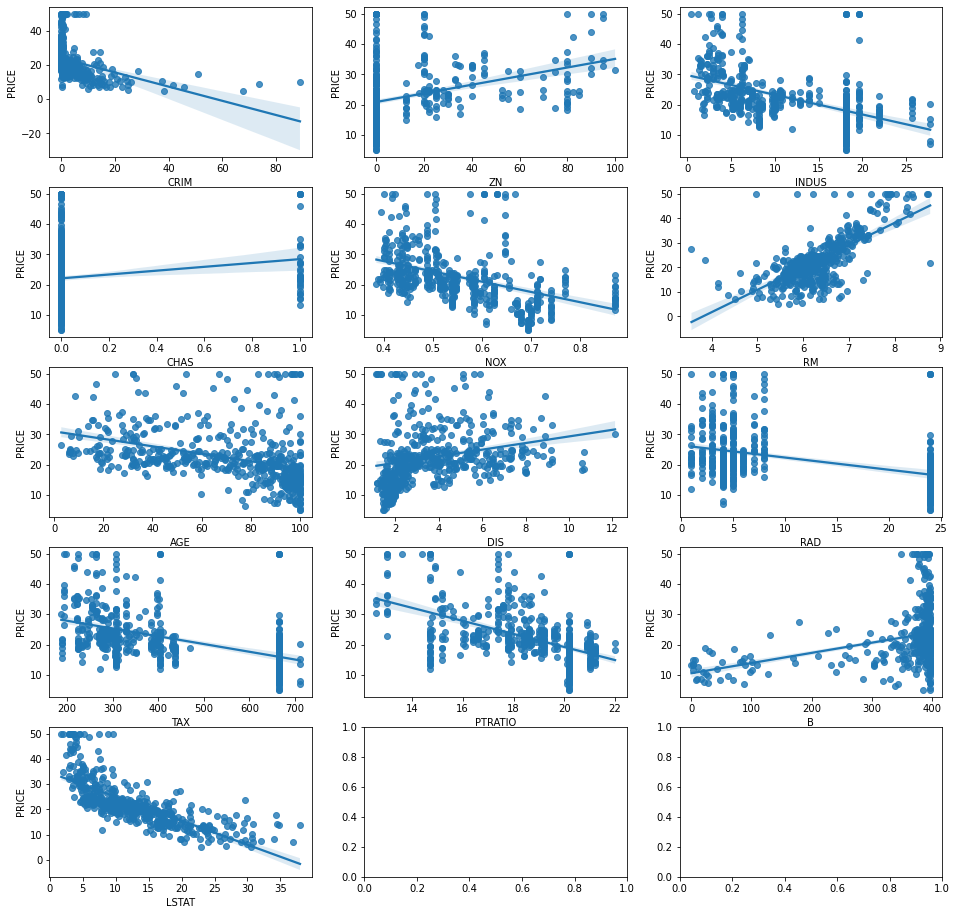

In [69]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [71]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [73]:
lr.predict([[0.001,15,1,0,0.59,5,10,0,1,10,5,100,1]])

array([41.89871274])

In [74]:
train_predict =lr.predict(X_train)

In [78]:
r2_score(y_train, train_predict)

0.7260499652589477

In [79]:
mse = mean_squared_error(y_train, train_predict)
mse

23.067723580046014

In [81]:
rmse = np.sqrt(mse)
rmse

4.80288700471352

## 서비스 만들어서 사용자가 넣어볼떄의 예시

In [96]:
one_person =input('CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT')

CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE0.0001, 13.0, 2.0, 0.0, 0.0, 56.0, 3.0, 8.0, 1.0, 0.0, 6.0, 400.0, 4.0


In [97]:
data = one_person.split(',')
data1=[]
for one in data:
    data1.append(float(one))
data1

[0.0001, 13.0, 2.0, 0.0, 0.0, 56.0, 3.0, 8.0, 1.0, 0.0, 6.0, 400.0, 4.0]

In [98]:
use_data=[data1]
use_data

[[0.0001, 13.0, 2.0, 0.0, 0.0, 56.0, 3.0, 8.0, 1.0, 0.0, 6.0, 400.0, 4.0]]

In [99]:
lr.predict(use_data)

array([216.74300356])

### 클라이언트에서 서버로 옮겨주는 흐름 

In [102]:
# 1.클라이언트에서 서버로 입력할떄

#클라이언트 서버에서 값이 넘어오기떄문에 float형태로 코딩 x 어차피 받아온값이 스트링이라 따로해줘야함
CRIM=input('CRIM:')
ZN=input('ZN:')
INDUS=input('INDUS:')
CHAS=input('CHAS:')
NOX=input('NOX:')
RM=input('RM:')
AGE=input('AGE:')
DIS=input('DIS:')
RAD=input('RAD:')
TAX=input('TAX:')
PTRATIO=input('PTRATIO:')
B=input('B:')
LSTAT=input('LSTAT:')

CRIM:0.0001
ZN:13.0
INDUS:2.0
CHAS:0.0
NOX:0.0
RM:56.0
AGE:3.0
DIS:8.0
RAD:1.0
TAX:0.0
PTRATIO:6.0
B:400.0
LSTAT:4.0


In [105]:
# 2.클라이언트에서 받아온 스트링값을 

# float으로 변환하여 2차원으로 변형하여 predict
data_list =[CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]

data_list2=[list(map(lambda x:float(x),data_list))] # 함수로안만들고 lambda 로 쓰겠다는 의미는 램에저장안하겠다 속도향상

In [106]:
data_list2

[[0.0001, 13.0, 2.0, 0.0, 0.0, 56.0, 3.0, 8.0, 1.0, 0.0, 6.0, 400.0, 4.0]]

In [107]:
lr.predict(use_data)

array([216.74300356])